<a href="https://colab.research.google.com/github/martinahuang/CUS615/blob/master/assignment3_MartinaHuang_Classification_Loading_Wine_Quality_Dataset_SVM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Dataset 

## Data Description

### Red Wine Quality - Parameters
* fixed.acidity (tartaric acid - g / dm^3): most acids involved with wine or fixed or nonvolatile (do not evaporate readily) 
* volatile.acidity (acetic acid - g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste 
* citric.acid (g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste 
* residual.sugar (g / dm^3): the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet 
* chlorides (sodium chloride - g / dm^3): the amount of salt in the wine 
* free.sulfur.dioxide (mg / dm^3): the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine 
* total.sulfur.dioxide (mg / dm^3): amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine 
* density (g / cm^3): the density of water is close to that of water depending on the percent alcohol and sugar content 
* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale 
* sulphates (potassium sulphate - g / dm3): a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant 
* alcohol (% by volume): the percent alcohol content of the wine 
* quality: quality score between 0 and 10

### Objective.

* To explore the physiocochemical properties of red wine
* To determine an optimal machine learning model for red wine quality classification


In [4]:
# Import librarires
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Sklearn moduels.
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Include any additional modules libraries your code might need here.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
%%capture 

# Execute this cell first to download the necessary data 
# This cell installs sample data necessary for this workshow on your colab virtual enviroment
!wget -O /content/sample_data/wineQualityReds.csv https://raw.githubusercontent.com/christoforou/intro_to_pandas_lab/master/data/red-wine-dataset/wineQualityReds.csv


In [0]:
# Code to load the data from file. Here we use the pandas library to read the csv file. 
datafile = "./sample_data/wineQualityReds.csv"
wine_df = pd.read_csv(datafile)
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)


In [0]:
# Split the data into a training and testing set using the sklearn function train_test_split
# Noteice that 
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25, random_state=42)


## Challenge 1
Use the variables `X_train`, `X_test`, `y_train`, and `y_test` to explore your data. In particular, calculate and display the following information.

* Number of samples in the training set in total and in each class.
* Number of samples in the testing set in total and in each class.
* Number of features in the dataset. 
* Number of classes in the dataset.
* IDs of the number of classes.


In [9]:
# Your Solution here
n_samples_train, n_features = X_train.shape
n_samples_test, _ = X_test.shape
n_features = len(np.unique(y_test))
n_classes = len(np.unique(y_train))

print("Number of samples in training set: %d ( %d positive, %d negative)" % (n_samples_train,np.sum(y_train==1),np.sum(y_train==0)))
print("Number of samples in the testing set: %d (%d positive, %d negative)" % (n_samples_test,np.sum(y_test==1),np.sum(y_test==0)))
print("Number of features: " +  str(n_features))
print("Number of classes: " + str(n_classes))
print("IDs for class labels: " + str(np.unique(y_train)))



Number of samples in training set: 1199 ( 0 positive, 0 negative)
Number of samples in the testing set: 400 (0 positive, 0 negative)
Number of features: 6
Number of classes: 6
IDs for class labels: [3 4 5 6 7 8]


# Challenge 2

Train a **Support Vector Machine** classifier using the `(X_train,y_train)` dataset and use the trained model to predict the underlying classes for the observations in the test dataset `X_test`. Store your prediction in a variable called `y_pred`.

In [0]:
# Your solution 
from sklearn import svm

#specify the classifier
model = svm.SVC(C=1.4,kernel = 'rbf')

#train the model using training set
model.fit(X_train,y_train)

#predict output
y_pred = model.predict(X_test)
y_true = y_test

# Challenge 3

Evaluate the performance of your classifier. Calculate and display the following:
* print the `confusion matrix`.
* `normalized confusion matrix`. 
* the probablitity of correct classification (accuracy score). 
* the `precision`, `recall`, and `f1-score` for each class.

In [11]:
# Your solution 
from sklearn.metrics import confusion_matrix

print("\n This is the confusion matrix")
cnf_mx = metrics.confusion_matrix(y_true, y_pred)
print(cnf_mx)

print("\n This is the normalized confusion matrix.")
cnf_mx_joint = cnf_mx.astype('float')/ cnf_mx.sum()
print(cnf_mx_joint)

# Accuracy.
#
acc = metrics.accuracy_score(y_true, y_pred)
# Display the output
print("Accuracy: %.3f" % acc)





 This is the confusion matrix
[[  0   0   0   1   0   0]
 [  0   0   2  11   0   0]
 [  0   0  89  75   0   0]
 [  0   0  51 118   0   0]
 [  0   0   5  42   1   0]
 [  0   0   1   4   0   0]]

 This is the normalized confusion matrix.
[[0.     0.     0.     0.0025 0.     0.    ]
 [0.     0.     0.005  0.0275 0.     0.    ]
 [0.     0.     0.2225 0.1875 0.     0.    ]
 [0.     0.     0.1275 0.295  0.     0.    ]
 [0.     0.     0.0125 0.105  0.0025 0.    ]
 [0.     0.     0.0025 0.01   0.     0.    ]]
Accuracy: 0.520


In [12]:

target_names = ['Negative', 'Positive','Negative', 'Positive','Negative', 'Positive']
print(metrics.classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.00      0.00      0.00        13
    Negative       0.60      0.54      0.57       164
    Positive       0.47      0.70      0.56       169
    Negative       1.00      0.02      0.04        48
    Positive       0.00      0.00      0.00         5

    accuracy                           0.52       400
   macro avg       0.35      0.21      0.20       400
weighted avg       0.57      0.52      0.48       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
target_names = ['Negative', 'Positive']
print(metrics.classification_report(y_true,y_pred,target_names=target_names))

# Challenge 4

The code below loads the same dataset, by treats it as a binary classification problem. That is, instead of classifying an observation into one of 10 categories (0..10), we consider all observations with score above 5 as being good and all observation below or equal to five as being bad.





In [0]:
# Code to load the data from file. Here we use the pandas library to read the csv file. 
datafile = "./sample_data/wineQualityReds.csv"
wine_df = pd.read_csv(datafile)
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)

wine_df['quality'] = np.where(wine_df['quality']>5,"Good","Bad")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25, random_state=42)


## Callenge 4.1
Use the variables `X_train`, `X_test`, `y_train`, and `y_test` to explore your data. In particular, calculate and display the following information.
* Number of samples in the training set in total and in each class.
* Number of samples in the testing set in total and in each class.
* Number of features in the dataset. 
* Number of classes in the dataset.
* IDs of the number of classes.




In [14]:
# Your Solution 
n_samples_train, n_features = X_train.shape
n_samples_test, _ = X_test.shape
n_features = len(np.unique(y_test))
n_classes = len(np.unique(y_train))

print("Number of samples in training set: %d ( %d positive, %d negative)" % (n_samples_train,np.sum(y_train==1),np.sum(y_train==0)))
print("Number of samples in the testing set: %d (%d positive, %d negative)" % (n_samples_test,np.sum(y_test==1),np.sum(y_test==0)))
print("Number of features: " +  str(n_features))
print("Number of classes: " + str(n_classes))
print("IDs for class labels: " + str(np.unique(y_train)))

Number of samples in training set: 1199 ( 0 positive, 0 negative)
Number of samples in the testing set: 400 (0 positive, 0 negative)
Number of features: 6
Number of classes: 6
IDs for class labels: [3 4 5 6 7 8]


## Challenge 4.2 
Train a **Support Vector Machine** classifier using the `(X_train,y_train)` dataset and use trained model to predict the underlying classes for the observations in the test dataset `X_test`. Store your prediction in a variable called `y_pred`.

In [0]:
# Your solution 
from sklearn import svm

#specify the classifier
model = svm.SVC(C=1.4,kernel = 'rbf')

#train the model using training set
model.fit(X_train,y_train)

#predict output
y_pred = model.predict(X_test)
y_true = y_test

## Challenge 4.3
Evaluate the performance of your classifier. Calculate and display the following:
* print the `confusion matrix`.
* `normalized confusion matrix`. 
* the probablitity of correct classification (accuracy score). 
* the `precision`, `recall`, and `f1-score` for each class.

In [16]:
# Your Solution 
from sklearn.metrics import confusion_matrix

print("\n This is the confusion matrix")
cnf_mx = metrics.confusion_matrix(y_true, y_pred)
print(cnf_mx)

print("\n This is the normalized confusion matrix.")
cnf_mx_joint = cnf_mx.astype('float')/ cnf_mx.sum()
print(cnf_mx_joint)


# Accuracy.
acc = metrics.accuracy_score(y_true, y_pred)
# Display the output
print("Accuracy: %.3f" % acc)

target_names = ['Negative', 'Positive']
print(metrics.classification_report(y_true,y_pred,target_names=target_names))


 This is the confusion matrix
[[  0   0   0   1   0   0]
 [  0   0   2  11   0   0]
 [  0   0  89  75   0   0]
 [  0   0  51 118   0   0]
 [  0   0   5  42   1   0]
 [  0   0   1   4   0   0]]

 This is the normalized confusion matrix.
[[0.     0.     0.     0.0025 0.     0.    ]
 [0.     0.     0.005  0.0275 0.     0.    ]
 [0.     0.     0.2225 0.1875 0.     0.    ]
 [0.     0.     0.1275 0.295  0.     0.    ]
 [0.     0.     0.0125 0.105  0.0025 0.    ]
 [0.     0.     0.0025 0.01   0.     0.    ]]
Accuracy: 0.520


ValueError: ignored

# Challenge 5

The **Support Vector Machine** classifier accepts a number of parameters. These parameters include the parameter 'C' (i.e. the regularization parameter), the 'kernel' which specified the kernel function to be used, and the parameter 'gamma' which can be used to specify the kernel coefficents for certain kernels (i.e. ‘rbf’, ‘poly’ and ‘sigmoid’). You can find more information about the various parameters in implementation of the SVM classifier on the following website. 

[SVM documentation on sklearn](
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[User Guide on Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

[Kernel Function Supported by sklearn library](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

After reading the documentation to understand how the various parameters are used, evaluate the classifier for different values of C, gamma and kernel parameters and identify which configuration achieve the best performance on the testing set. Plot or print your results.


In [0]:
# Your solution here.
from sklearn import svm, datasets
import matplotlib.pyplot as plt
#A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.
# gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [28]:
model = svm.SVC(C=1, kernel='rbf',probability=False)
model.fit(X_train,y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
model.support_vectors_


array([[ 7.6 ,  1.58,  0.  , ...,  3.5 ,  0.4 , 10.9 ],
       [ 8.3 ,  1.02,  0.02, ...,  3.48,  0.49, 11.  ],
       [10.4 ,  0.44,  0.42, ...,  3.38,  0.86,  9.9 ],
       ...,
       [10.3 ,  0.32,  0.45, ...,  3.23,  0.82, 12.6 ],
       [10.7 ,  0.35,  0.53, ...,  3.15,  0.65, 11.  ],
       [11.3 ,  0.62,  0.67, ...,  3.22,  0.69, 13.4 ]])

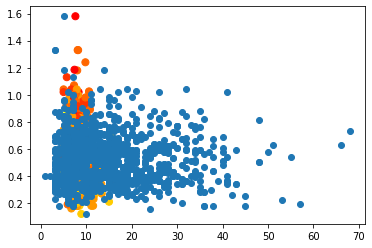

In [37]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,5],model.support_vectors_[:,1])

In [40]:
model1 = svm.SVC(C=3, kernel='linear',probability=False)
model1.fit(X_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

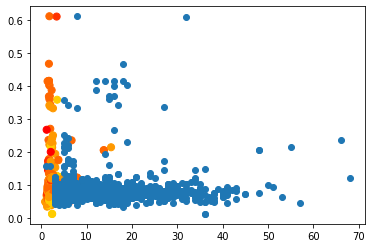

In [46]:
plt.scatter(X_train.iloc[:, 3], X_train.iloc[:, 4], c=y_train, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,5],model.support_vectors_[:,4])

In [30]:
model2 = svm.SVC(C=6, kernel='poly',probability=False)
model2.fit(X_train,y_train)

SVC(C=6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)